In [1]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

#### Problem Statement- Here we are Predicting  whether a customer is churning or not based on these below columns 
##### "Low churn rates" means happy customers;"High churn rates" means customers are leaving the plan.
##### Churn rate is the best  measure of "Customer  Satisfaction".

#### About the dataset; Dataset consists of group of population like "Age","gender","Phone number"
### Based on the past data we are predicting the future whether the customer is churning or not. 
#### Dataset has no of customers:2000 with 16 features(column names); Dependent Variable(y) is Churn And Remaining all are Independent Features(X)
### Finally  prediction(Estimating) whether the customer is willing to use the subscription  or not (Yes or No)
### Our Target Variable is "Churn" 

### To download the dataset <a href='https://drive.google.com/file/d/13jGTeW3vlLvQ5aimetJwmzoO_YXiGTtw/view?usp=sharing' title = "Google Drive"> Click here

In [20]:
df = pd.read_csv("Data (1).csv", sep=",")## Load the data set in csv format

In [21]:
df.head()## gives the first 5 rows of the dataset

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0


In [22]:
df.info()### prints information about data like no of columns,memory usage,data type value,column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   1980 non-null   float64
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     1990 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          1975 non-null   float64
 13  maximum_days_inactive   1972 non-null   object 
 14  customer_support_calls  2000 non-null   

### Data preprocessing (Exploratory Data Analysis) EDA

In [ ]:
## EDA means giving useful insights of data to understand well,interms of visualizing the data and removing duplicates, missing vales,outliers(odd data point)

In [23]:
#### Checking the Different Data Types of Data

In [24]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed     float64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched            float64
maximum_days_inactive      object
customer_support_calls      int64
churn                     float64
dtype: object

In [25]:
####gives the Missing Values in the data
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed     20
multi_screen               0
mail_subscribed            0
weekly_mins_watched       10
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched            25
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [26]:
#Total Number of Missing Values in the data--->142
df.isnull().sum().sum() 

142

In [27]:
df.shape ## size of the data set interms of rows and columns

(2000, 16)

In [28]:
df1 = df.copy()### making the copy of the dataset and storing the df1

In [29]:
df1.shape

(2000, 16)

#### Dropping Missing Values from Dataset

In [30]:
df1=df1.dropna()##Dropping rows/columns which contain null values(NaN, junk values)
df1.shape  ## Here Rows size reduced in the data

(1866, 16)

In [31]:
df1['gender'].value_counts()## gives the unique count of "gender" column name

Male      991
Female    866
1           4
0           3
9           1
4           1
Name: gender, dtype: int64


### Data Preprocessing is a method in which we are preparing raw data in to more understandable way

In [33]:
df1['gender']=df1['gender'].replace('0', 'Female') ###To increase the "female" count in the data, so we have replsced column names 1,0,9,4 in to female gender type
df1['gender']=df1['gender'].replace('1', 'Female')

In [34]:
df1['gender']=df1['gender'].replace('4', 'Female')
df1['gender']=df1['gender'].replace('9', 'Female')

In [35]:
df1['gender'].value_counts()### so, here we have increased the female count

Male      991
Female    875
Name: gender, dtype: int64

In [37]:
df1['gender']= df1['gender'].map({'Male':0, 'Female':1})  ### Using Map function converts or transforms  the 0's to Male and 1's to Female

In [38]:
df1['gender'].value_counts() ##  gives the count of "Male" as 991 and "Female" as 875

0    991
1    875
Name: gender, dtype: int64

In [40]:
df1.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                      int64
age                         int64
no_of_days_subscribed     float64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched            float64
maximum_days_inactive      object
customer_support_calls      int64
churn                     float64
dtype: object

#### EDA

<AxesSubplot:xlabel='churn', ylabel='count'>

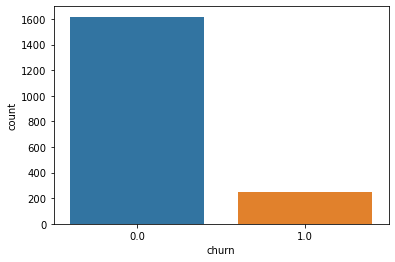

In [42]:
#### Distribution of counts of variable "Churn" using bar representation(2D)
### Here, 0 indicates "no churn", 1 indicates "Churn"

sns.countplot(x = 'churn', data = df1)

In [43]:
df1['churn'].value_counts(normalize = True) ## gives the "churn" variable count of 0's as 86% and 1's as 13% (percentage Format)

0.0    0.866559
1.0    0.133441
Name: churn, dtype: float64

#### Our Class variable(churn) is Imbalanced here with 86% of data is 0(no churn) and rest is with 1(churn). We need to balance it moving further Analysis.

<AxesSubplot:xlabel='gender', ylabel='count'>

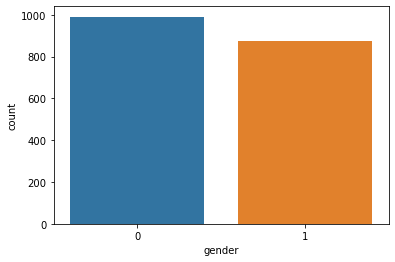

In [45]:
sns.countplot(x = 'gender', data = df1)  ### "gender" variable Male- 0 and Female- 1

In [46]:
df1['gender'].value_counts()/len(df1)## To denote "gender" in percentage Male- 0 and Female- 1

0    0.531083
1    0.468917
Name: gender, dtype: float64

#### Around 53.6% of customers were Male while 46.4% were female

<AxesSubplot:xlabel='multi_screen', ylabel='count'>

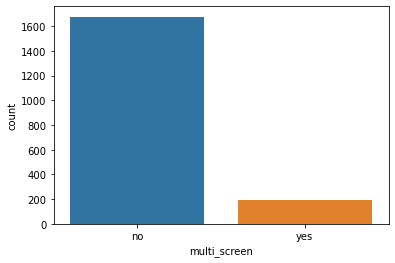

In [47]:
sns.countplot(x = 'multi_screen', data = df1) ## customer who choose "multi_screen" as Yes / No

In [48]:
df1['multi_screen'].value_counts()/len(df1)*100  ## Multiscreen in Yes as 10% No as 89% in percentage

no     89.817792
yes    10.182208
Name: multi_screen, dtype: float64

#### Only 10% of the customer have Multi_Screen Subscription and rest of them have Single Screen Subscription
#### Probably, the charge for Single Screen is less compared to multi_screen. So, most of the customers opted for Single_Screen Subscription.

#### Mail_Subscribed

<AxesSubplot:xlabel='mail_subscribed', ylabel='count'>

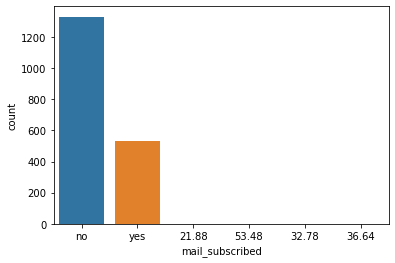

In [49]:
sns.countplot(x = 'mail_subscribed', data = df1)##classifying the count  "Mail_Subscribed" Yes or No

In [50]:
df1['mail_subscribed']=df1['mail_subscribed'].replace('36.64', 'yes')  ### Replacing the above count plot "Mail_Subscribed" X-axis values
df1['mail_subscribed']=df1['mail_subscribed'].replace('53.48', 'yes')  ### as Yes 
df1['mail_subscribed']=df1['mail_subscribed'].replace('21.88', 'yes')
df1['mail_subscribed']=df1['mail_subscribed'].replace('32.78', 'yes')

In [51]:
df1['mail_subscribed'].value_counts()/len(df1)*100   ### Percentage of mail_subscribed Yes as 28% only and No as 71%

no     71.221865
yes    28.778135
Name: mail_subscribed, dtype: float64

<AxesSubplot:xlabel='mail_subscribed', ylabel='count'>

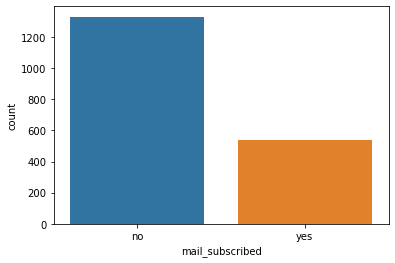

In [52]:
sns.countplot(x = 'mail_subscribed', data = df1)

#### Around 72% of customers haven't opted for Mail Subscription. Nowadays, most of the services asks for Mail Subscription

#### Maximum_Days_Inactive

<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

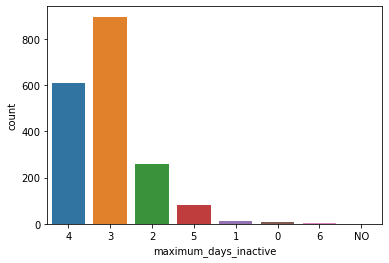

In [53]:
sns.countplot(x = 'maximum_days_inactive', data = df1)  ### For maximum 3 days Mostly Customers are Inactive

In [54]:
df1['maximum_days_inactive'].value_counts()

3     895
4     610
2     257
5      81
1      11
0       9
6       2
NO      1
Name: maximum_days_inactive, dtype: int64

#### Here, one of the value is "NO". Replacing it with 0 to avoid further errors

In [55]:
df1['maximum_days_inactive']=df1['maximum_days_inactive'].replace("NO", '0')

<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

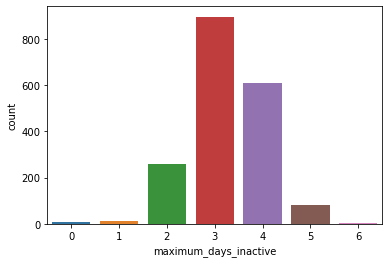

In [56]:
sns.countplot(x = 'maximum_days_inactive', data = df1)

#### The Maximum Number of Inactive Days are 3 with 945 Customers followed by 4 days with 644 Customers

#### Visualization with respective to Churn

<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

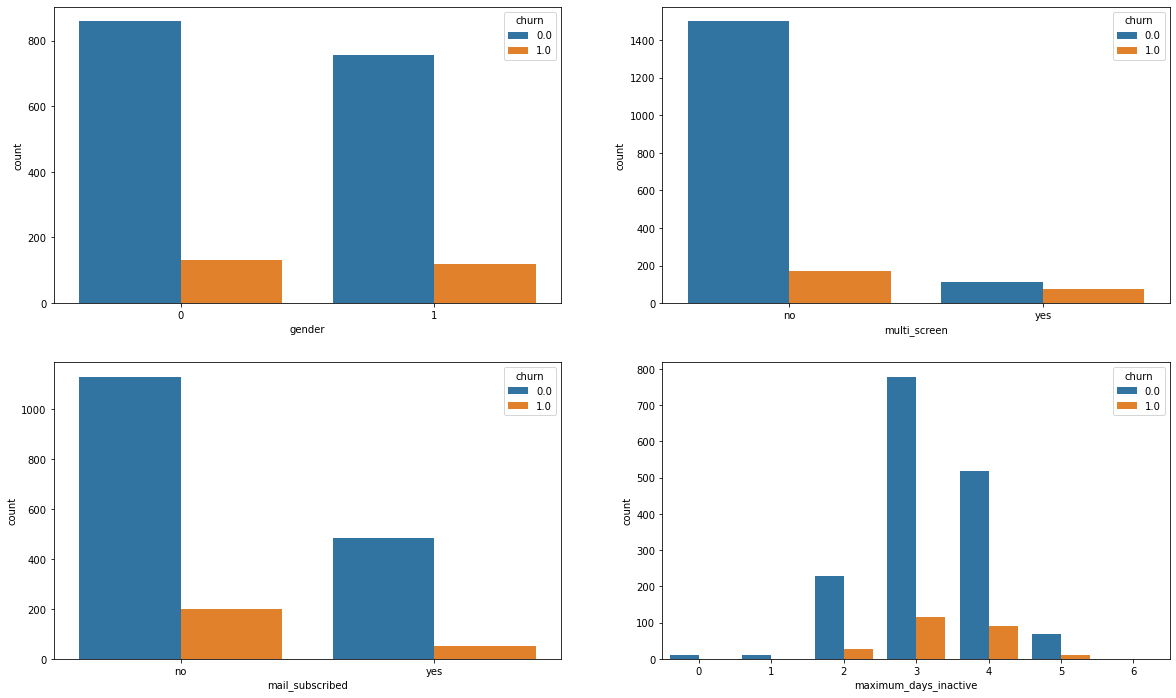

In [57]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='gender', hue = 'churn',data = df1, ax=axarr[0][0])### Gender vs Churn count
sns.countplot(x='multi_screen', hue = 'churn',data = df1, ax=axarr[0][1]) ### Multiscreen vs Churn count
sns.countplot(x='mail_subscribed', hue = 'churn',data = df1, ax=axarr[1][0])#### Mailsubscribed vs Churn count
sns.countplot(x='maximum_days_inactive', hue = 'churn',data = df1, ax=axarr[1][1])####maximum days inactive vs churn count

In [58]:
df1.groupby(['gender'])['churn'].value_counts() #Gender Vs Churn

gender  churn
0       0.0      861
        1.0      130
1       0.0      756
        1.0      119
Name: churn, dtype: int64

In [59]:
df1.groupby(['multi_screen'])['churn'].value_counts() #multi_screen Vs Churn

multi_screen  churn
no            0.0      1504
              1.0       172
yes           0.0       113
              1.0        77
Name: churn, dtype: int64

In [60]:
df1.groupby(['mail_subscribed'])['churn'].value_counts() #mail_Subscribed Vs Churn

mail_subscribed  churn
no               0.0      1131
                 1.0       198
yes              0.0       486
                 1.0        51
Name: churn, dtype: int64

#### Insights form the EDA Plots
#### From Plot 1, we can say that both male & female customers are almost equally churned
#### From Plot 2, Customers with no Multi_Screen (single screen) have more churned customers rather than with multi_screen
#### From Plot 3,
#### a. Customers with no mail_subscribed have more churned customers than with mail subscription.
#### b. Having Mail Subscription & Sending Mails can lead to more way of advertising to customers and make them use its service.
#### c. These days many of the services have mandatory mail subscription.
#### From plot 4, Customers with maximum_days_inactive (3)days have higher churn customers followed by 4 days.

#### Pie Chart for Churn

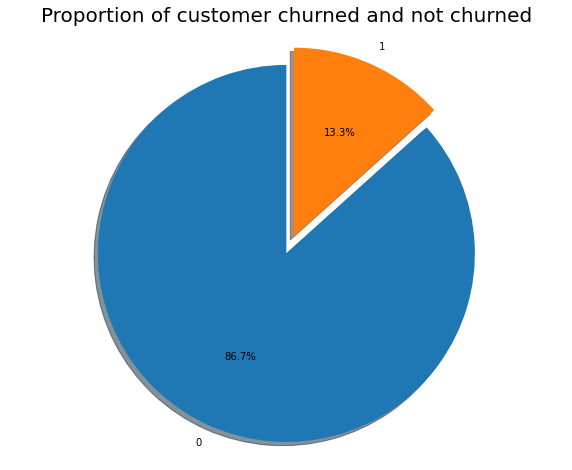

In [62]:
labels = '0', '1' # 0--->No Churn, 1----> Churn
sizes = [df1.churn[df1['churn']==0].count(), df1.churn[df1['churn']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and not churned", size = 20)
plt.show()

#### From above pie chart, we can say that 86.7%(0) of customers are of no churn while rest are churned customers.

#### Total No. of Customer Support Calls

In [64]:
df1['customer_support_calls'].sum() #2885 Calls received by Customer Care from all the customers

2885

#### Videos Watched

In [65]:
df1['videos_watched'].sum() #Total Number of Videos Watched by Customers

8375.0

#### Gender V/S Multi Screen Subscription

In [69]:
df1.groupby(['gender'])['multi_screen'].value_counts()

gender  multi_screen
0       no              886
        yes             105
1       no              790
        yes              85
Name: multi_screen, dtype: int64

#### We can say that, only 105 male customers & 85 Female customers have opted for Multi_screen. Rest all have Single Screen Subscription

In [67]:
df1['multi_screen'].value_counts()/len(df1)*100

no     89.817792
yes    10.182208
Name: multi_screen, dtype: float64

#### Gender Vs Customer Support Calls

In [70]:
df1.groupby(['gender'])['customer_support_calls'].sum()

gender
0    1549
1    1336
Name: customer_support_calls, dtype: int64

#### Male Customers have more Customer_support_calls compared to Female Customers

In [71]:
df1['multi_screen']= df1['multi_screen'].replace("no", "0") # MutiScreen "NO"---> 0
df1['multi_screen']= df1['multi_screen'].replace("yes", "1") # MutiScreen "yes"---> 1

####

df1['mail_subscribed']=df1['mail_subscribed'].replace("no", "0") # Mail Subscribed "no"---> 0
df1['mail_subscribed']=df1['mail_subscribed'].replace("yes", "1") # Mail Subscribed "yes"--->1

In [72]:
df1.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,1,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,1,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,1,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,1,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,1,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0


In [73]:
# After Filling Missing Values, Pre-Processing data and EDA on few of the columns. Our Dataset is ready for model building process

In [74]:
df1 = df1.drop(['customer_id', 'phone_no', 'year'], axis = 1)

In [75]:
df1.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,1,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,1,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,1,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,1,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,1,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0


In [76]:
#### Creating Age in to Bins(buckets)to equal intervals 

In [77]:
df1['age'].unique() ### prints age of unique values

array([36, 39, 65, 24, 40, 61, 31, 34, 30, 23, 21, 44, 45, 59, 32, 50, 28,
       37, 33, 35, 52, 55, 41, 43, 38, 26, 29, 27, 56, 49, 47, 42, 67, 46,
       64, 48, 57, 66, 22, 51, 25, 62, 53, 19, 76, 54, 60, 75, 58, 20, 74,
       77, 82, 80, 71, 73, 18, 70, 72, 63, 69, 68], dtype=int64)

In [78]:
df1['age'].describe() ### gives summary of my Age varibale which gives me min,max,count,deviation,count and median(middle value) values

count    1866.000000
mean       38.670954
std        10.126597
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        82.000000
Name: age, dtype: float64

In [79]:
df1['age_bins'] = pd.cut(x = df1['age'], bins=[18,36,54,72,90]) ### pd.cut method used to separate the elements into different intervals

In [80]:
df1.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,age_bins
0,1,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0,"(18, 36]"
1,1,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0,"(36, 54]"
2,1,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0,"(54, 72]"
3,1,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0,"(18, 36]"
4,1,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0,"(36, 54]"


<AxesSubplot:xlabel='age_bins', ylabel='count'>

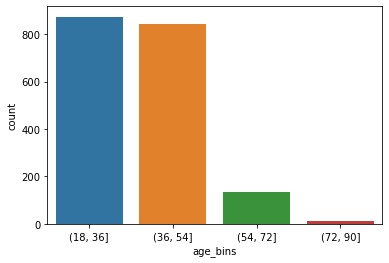

In [81]:
sns.countplot(x='age_bins',data = df1) ### Gives count of Age in different intervals

As we can see most number of customers are from age group (18,36),(36,54). This age includes Teenagers,Adults and rest are older adults who are less in number.

<AxesSubplot:xlabel='age_bins', ylabel='maximum_daily_mins'>

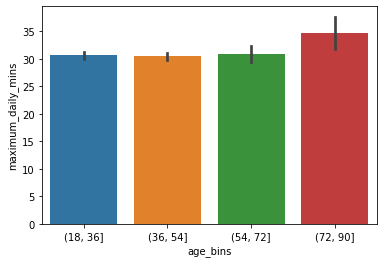

In [83]:
sns.barplot(x='age_bins',y = "maximum_daily_mins",data = df1)

#### This is interesting!!! Age Group (72,90) has a better average of maximum_daily_mins compared to rest of age groups.
#### Maybe in this age_group of (72,90) many of them were relaxing/retire stage. They get bored and using the service.
#### Rest other age groups have approximately same average daily_mins

In [86]:
df1.groupby(['age_bins'])['churn'].value_counts()

age_bins  churn
(18, 36]  0.0      751
          1.0      122
(36, 54]  0.0      742
          1.0      100
(54, 72]  0.0      114
          1.0       22
(72, 90]  0.0        8
          1.0        4
Name: churn, dtype: int64

#### Here, we can see age_bins Vs Churn. Most of the people from age groups (18,36) & (36,54) have churned out. Least from (72,90)

In [97]:
df2 = df1.copy()

In [98]:
df2.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,age_bins
0,1,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0,"(18, 36]"
1,1,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0,"(36, 54]"
2,1,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0,"(54, 72]"
3,1,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0,"(18, 36]"
4,1,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0,"(36, 54]"


In [99]:
df2 = df2.drop(['age_bins'],axis = 1)

In [100]:
df2.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,1,36,62.0,0,0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,1,39,149.0,0,0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,1,65,126.0,0,0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,1,24,131.0,0,1,321.30,9.5,36.41,102,4.0,3,3,0.0
4,1,40,191.0,0,0,243.00,10.9,27.54,83,7.0,3,1,0.0


In [101]:
#nums = ['age','no_of_days_subscribed','weekly_mins_watched','minimum_daily_mins','maximum_daily_mins','weekly_max_night_mins','videos_watched','maximum_days_inactive','customer_support_calls']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()### Scaling the data in range from 0 to 1 
## reshape  function shapes an array without affecting the columns in the dataset.Here I gave 9 Columns and it reshaped into 13 columns.
df2['age'] = scaler.fit_transform(df2['age'].values.reshape(-1,1))##by using fit_transform() method 
df2['no_of_days_subscribed'] = scaler.fit_transform(df2['no_of_days_subscribed'].values.reshape(-1,1))
df2['weekly_mins_watched'] = scaler.fit_transform(df2['weekly_mins_watched'].values.reshape(-1,1))
df2['minimum_daily_mins'] = scaler.fit_transform(df2['minimum_daily_mins'].values.reshape(-1,1))
df2['maximum_daily_mins'] = scaler.fit_transform(df2['maximum_daily_mins'].values.reshape(-1,1))
df2['weekly_max_night_mins'] = scaler.fit_transform(df2['weekly_max_night_mins'].values.reshape(-1,1))
df2['videos_watched'] = scaler.fit_transform(df2['videos_watched'].values.reshape(-1,1))
df2['maximum_days_inactive'] = scaler.fit_transform(df2['maximum_days_inactive'].values.reshape(-1,1))
df2['customer_support_calls'] = scaler.fit_transform(df2['customer_support_calls'].values.reshape(-1,1))

In [102]:
df2.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,1,-0.263827,-0.953154,0,0,-0.138102,0.721525,-1.512683,-0.939316,-1.409389,0.923955,-0.418413,0.0
1,1,0.032502,1.225779,0,0,-0.074775,-0.900341,0.304985,-0.683744,-0.601302,-0.310190,0.347788,0.0
2,1,2.600686,0.649739,0,0,-0.164564,0.613400,-2.272240,-0.479287,-1.409389,0.923955,2.646388,1.0
3,1,-1.449143,0.774965,0,1,-0.063137,-0.251595,0.638663,0.082972,-0.197258,-0.310190,1.113988,0.0
4,1,0.131278,2.277677,0,0,-0.097076,0.252986,-0.334931,-0.888202,1.014872,-0.310190,-0.418413,0.0


In [137]:
df2['multi_screen'] = pd.to_numeric(df2['multi_screen'])### converts into numeric data type
df2['mail_subscribed'] = pd.to_numeric(df2['mail_subscribed'])

### Model Building & Evaluation

#### Logistic Regression : It is a Classification algorithm that used to predict the probability of a categorical Dependent(churn) variable.
#### Outcome variable gives only two variable as 0(no churn) and 1(churn).So it is a Binary Classification.
###### Finally Our main end goal is to find the customer churning or not.

In [138]:
y = df2['churn'].values
X = df2.drop(columns = ['churn'])

In [139]:
#Splitting into Train & Test in to 80:20 Training and Validation datasets
###X_train and y_train contains the independent and response variable values for the training dataset respectively.
### X_test and y_test contains the independent and response variable values for the test data set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 101)

In [140]:
print("X_train Shape", X_train.shape)
print("y_train Shape", y_train.shape)
print("X_test Shape", X_test.shape)
print("y_test Shape", y_test.shape)

X_train Shape (1492, 12)
y_train Shape (1492,)
X_test Shape (374, 12)
y_test Shape (374,)


In [141]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [142]:
# Accuracy Score
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8609625668449198


### As our data is imbalanced, so I have achieved accuracy score of 86% . 

### Also tried using weighted_average which got a better F1_score of 82% compared to Macro_average

#### Confusion Matrix is used to evaluate the performance of a classification model.The rows represents the predicted values of the target variable(Churn).
#### Here Accuracy is 85% with Predicted my Class Varibles(Predictors).

In [146]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction_test))

[[311   5]
 [ 47  11]]


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       316
         1.0       0.69      0.19      0.30        58

    accuracy                           0.86       374
   macro avg       0.78      0.59      0.61       374
weighted avg       0.84      0.86      0.83       374



In [176]:
print("accuracy",(round(accuracy_score(y_test, prediction_test),4)))
print("Recall",(round(recall_score(y_test,  prediction_test,average = "weighted"),4)))
print("F1 Score",(round(f1_score(y_test,  prediction_test,average = "weighted"),4)))
print("Precision",(round(precision_score(y_test,  prediction_test, average = "weighted"),4)))

accuracy 0.861
Recall 0.861
F1 Score 0.8258
Precision 0.8406


### Accuracy for Log Reg Model is 86% which is good it means it estimated  my customers churn rate  with 86% good accuracy.
### Here F1 score is a measure used to compare performance of a two classifiers
### Highest F1 score with 0.82 that model would be good  in terms of performance(prediction).

#### F1 score depends on Precision and Recall score,(value) gives better than accuracy

#                                                              THE END 